# Visualize benchmark results

We've benchmarked moslin (and variants that only use gene expression or lineage tracing information) with [LineageOT](https://doi.org/10.1038/s41467-021-25133-1) on the C. elegans data and visualize the results here. 

Changelog:
- Show performance over the full parameter grid and highlight the optimal identified hyperparameter values. 

## Preliminaries

### Import packages

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from moslin_utils.constants import FIG_DIR, DATA_DIR
import moslin_utils as mu

### Set up paths

Define the paths for data and figures. 

In [3]:
FIG_DIR = FIG_DIR / "packer_c_elegans"
DATA_DIR = DATA_DIR / "packer_c_elegans"

### Set global parameters

In [4]:
mu.settings.save_figures = False

### Import the data

Import a .csv file with the gridsearch results

In [5]:
runs_df = pd.read_csv(DATA_DIR / "ML_2024-06-05_celegans_precise_and_abpxp.csv", index_col=0)
runs_df.head()

,_runtime,converged,deviation_from_balanced,early_cost,mean_error,_step,_wandb,late_cost,_timestamp,tp,kind,alpha,tau_a,epsilon,scale_cost,lineage_info,max_inner_iterations,name
0,40.387466,True,2.220446e-16,0.999754,0.999757,0,{'runtime': 39},0.999760,1.699616e+09,450-510,GW,1.0,1,0.5,mean,abpxp,30000.0,eternal-sweep-600
1,73.671219,True,0.000000e+00,0.999860,0.999848,0,{'runtime': 73},0.999836,1.699616e+09,390-450,GW,1.0,1,0.5,mean,abpxp,30000.0,sleek-sweep-599
2,370.097028,True,0.000000e+00,0.999686,0.999662,0,{'runtime': 369},0.999639,1.699616e+09,330-390,GW,1.0,1,0.5,mean,abpxp,30000.0,giddy-sweep-598
3,1270.005563,True,6.661338e-16,0.999899,0.999905,0,{'runtime': 1269},0.999912,1.699617e+09,270-330,GW,1.0,1,0.5,mean,abpxp,30000.0,skilled-sweep-597
4,307.494087,True,2.220446e-16,0.999964,0.999963,0,{'runtime': 306},0.999962,1.699616e+09,210-270,GW,1.0,1,0.5,mean,abpxp,30000.0,iconic-sweep-596


Reorder categories. 

In [6]:
runs_df["kind"] = runs_df["kind"].astype("category").cat.reorder_categories(["LineageOT", "W", "GW", "moslin"])

### Define utility functions

## Visualize the results

### Compare best performing runs

Show our results and hyperparameters on the subset of cells with precise lineage information.

Removing 19/330 not converged runs.
     alpha       kind       tp  epsilon scale_cost  mean_error
647    NaN  LineageOT  170-210    0.010       mean    0.332473
634    NaN  LineageOT  210-270    0.050       mean    0.316382
633    NaN  LineageOT  270-330    0.050       mean    0.267600
643    NaN  LineageOT  330-390    0.010       mean    0.233266
631    NaN  LineageOT  390-450    0.050       mean    0.138912
618    NaN  LineageOT  450-510    0.100       mean    0.137876
563   0.00          W  170-210    0.100       mean    0.436702
573   0.00          W  210-270    0.050       mean    0.438561
574   0.00          W  270-330    0.050       mean    0.348652
572   0.00          W  330-390    0.050       mean    0.267483
571   0.00          W  390-450    0.050       mean    0.169568
558   0.00          W  450-510    0.100       mean    0.155998
47    1.00         GW  170-210    0.010       mean    0.096471
58    1.00         GW  210-270    0.001       mean    0.157038
57    1.00         

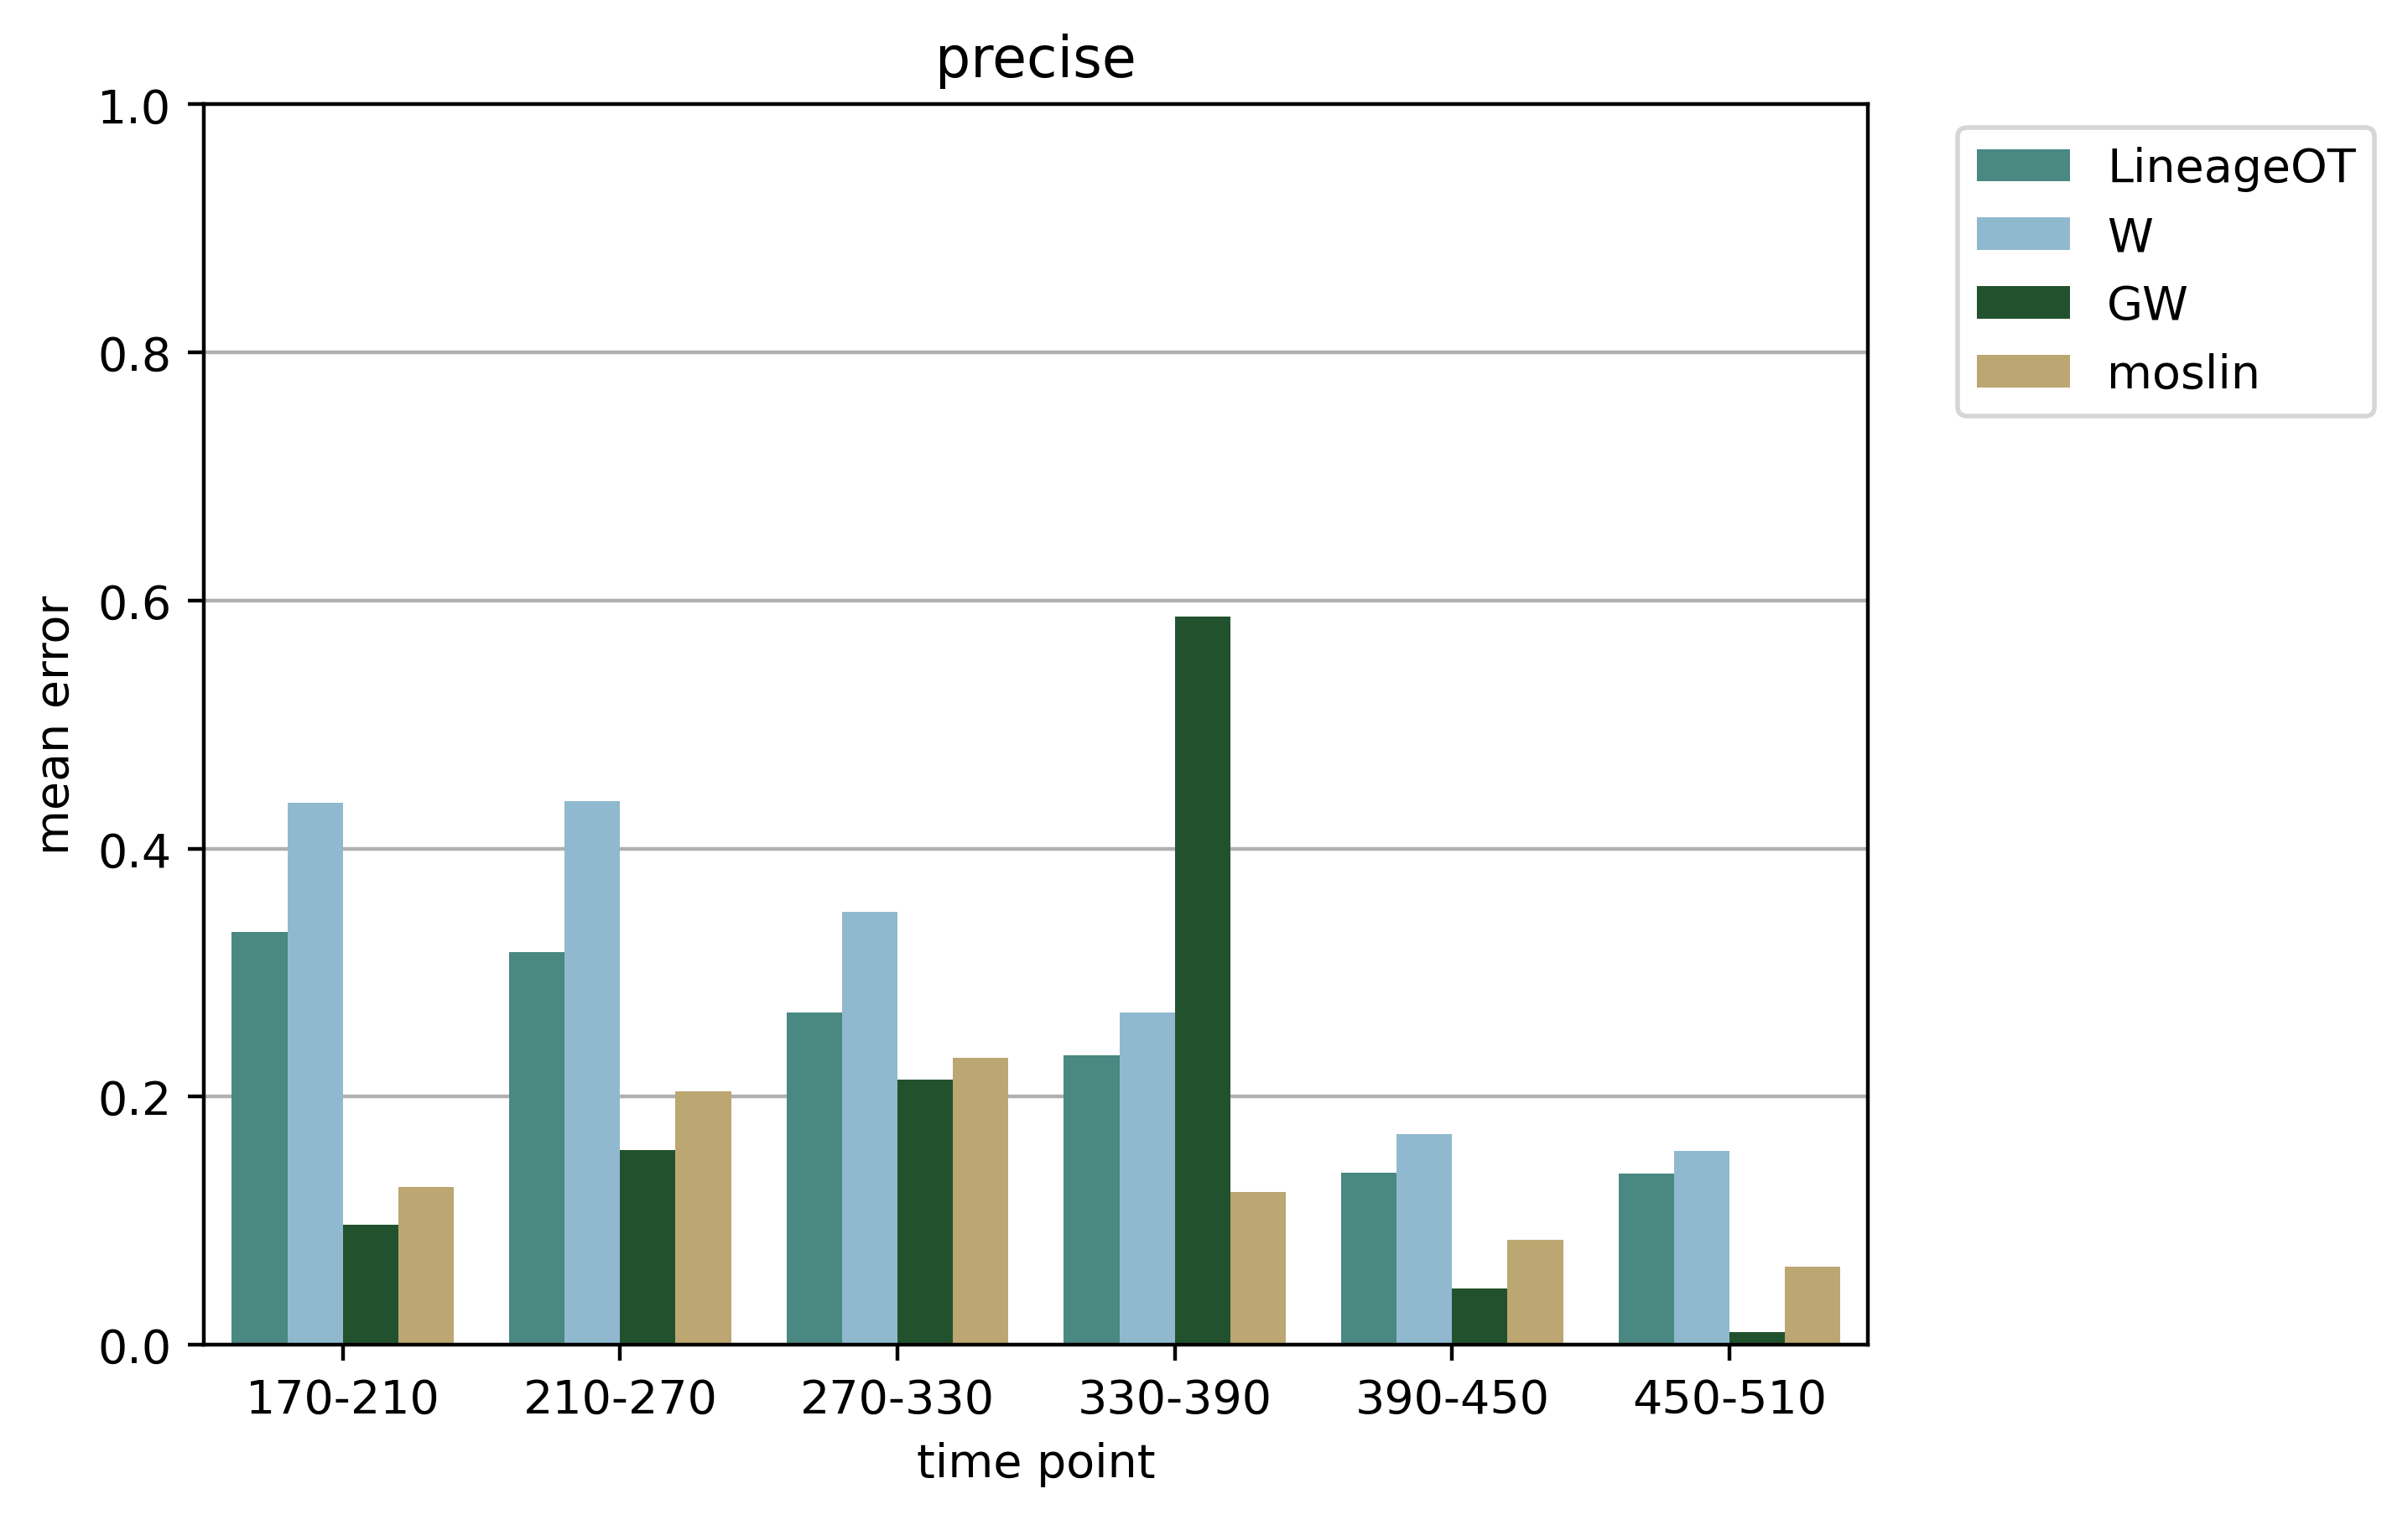

In [12]:
mu.pl.gridsearch_bar(
    runs_df, lineage_info="precise", converged=True, save=FIG_DIR / "gridsearch_bar_precise.pdf", ylim=[0, 1]
)

Show our results and hyperparameters on the ABpxp lineage.

Removing 12/330 not converged runs.
     alpha       kind       tp  epsilon scale_cost  mean_error
629    NaN  LineageOT  170-210    0.050       mean    0.760436
628    NaN  LineageOT  210-270    0.050       mean    0.534925
627    NaN  LineageOT  270-330    0.050       mean    0.399667
626    NaN  LineageOT  330-390    0.050       mean    0.568237
625    NaN  LineageOT  390-450    0.050       mean    0.286609
624    NaN  LineageOT  450-510    0.050       mean    0.201518
545   0.00          W  170-210    0.500       mean    0.970943
556   0.00          W  210-270    0.100       mean    0.719254
567   0.00          W  270-330    0.050       mean    0.489825
566   0.00          W  330-390    0.050       mean    0.623947
565   0.00          W  390-450    0.050       mean    0.315022
552   0.00          W  450-510    0.100       mean    0.236753
41    1.00         GW  170-210    0.010       mean    0.728826
52    1.00         GW  210-270    0.001       mean    0.550579
51    1.00         

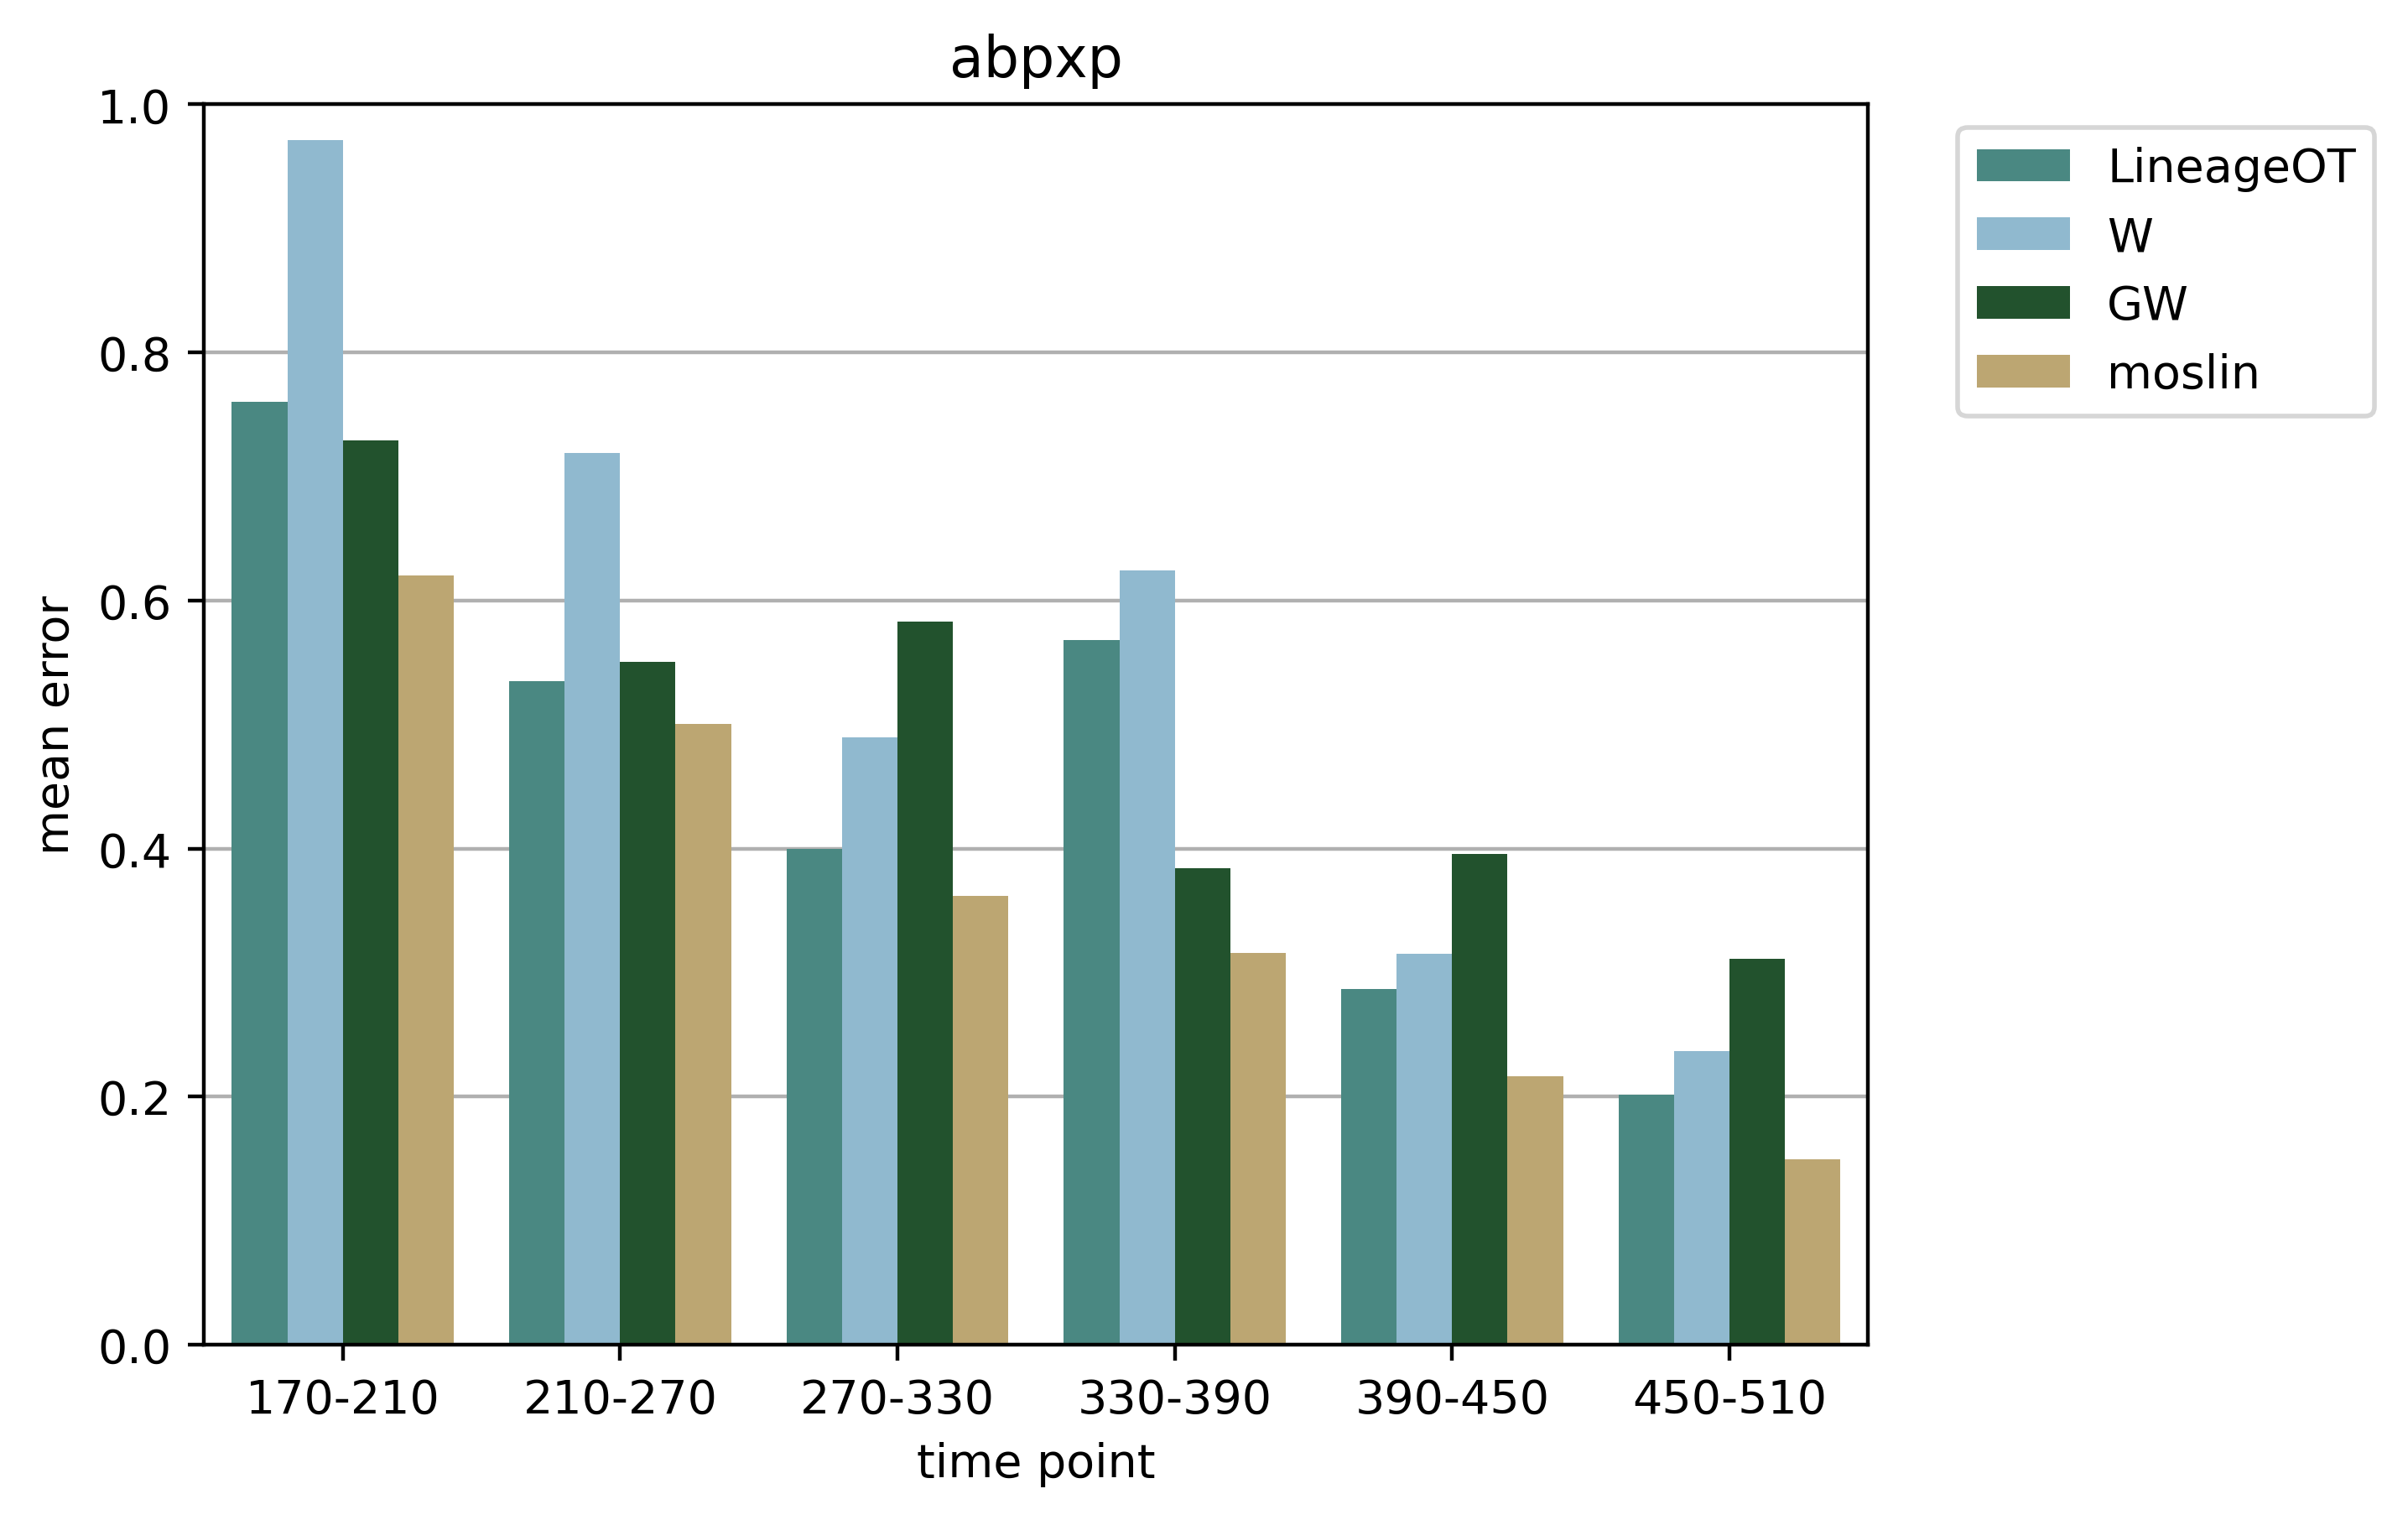

In [14]:
mu.pl.gridsearch_bar(
    runs_df, lineage_info="abpxp", converged=True, save=FIG_DIR / "gridsarch_bar_abpxp.pdf", ylim=[0, 1]
)

### Show the full grid

Show the full grid for ABpxp and precise lineage information. 

Lineage info: precise
Not saving the figure, as `moslin_utils.settings.save_figures` is set to `False`.


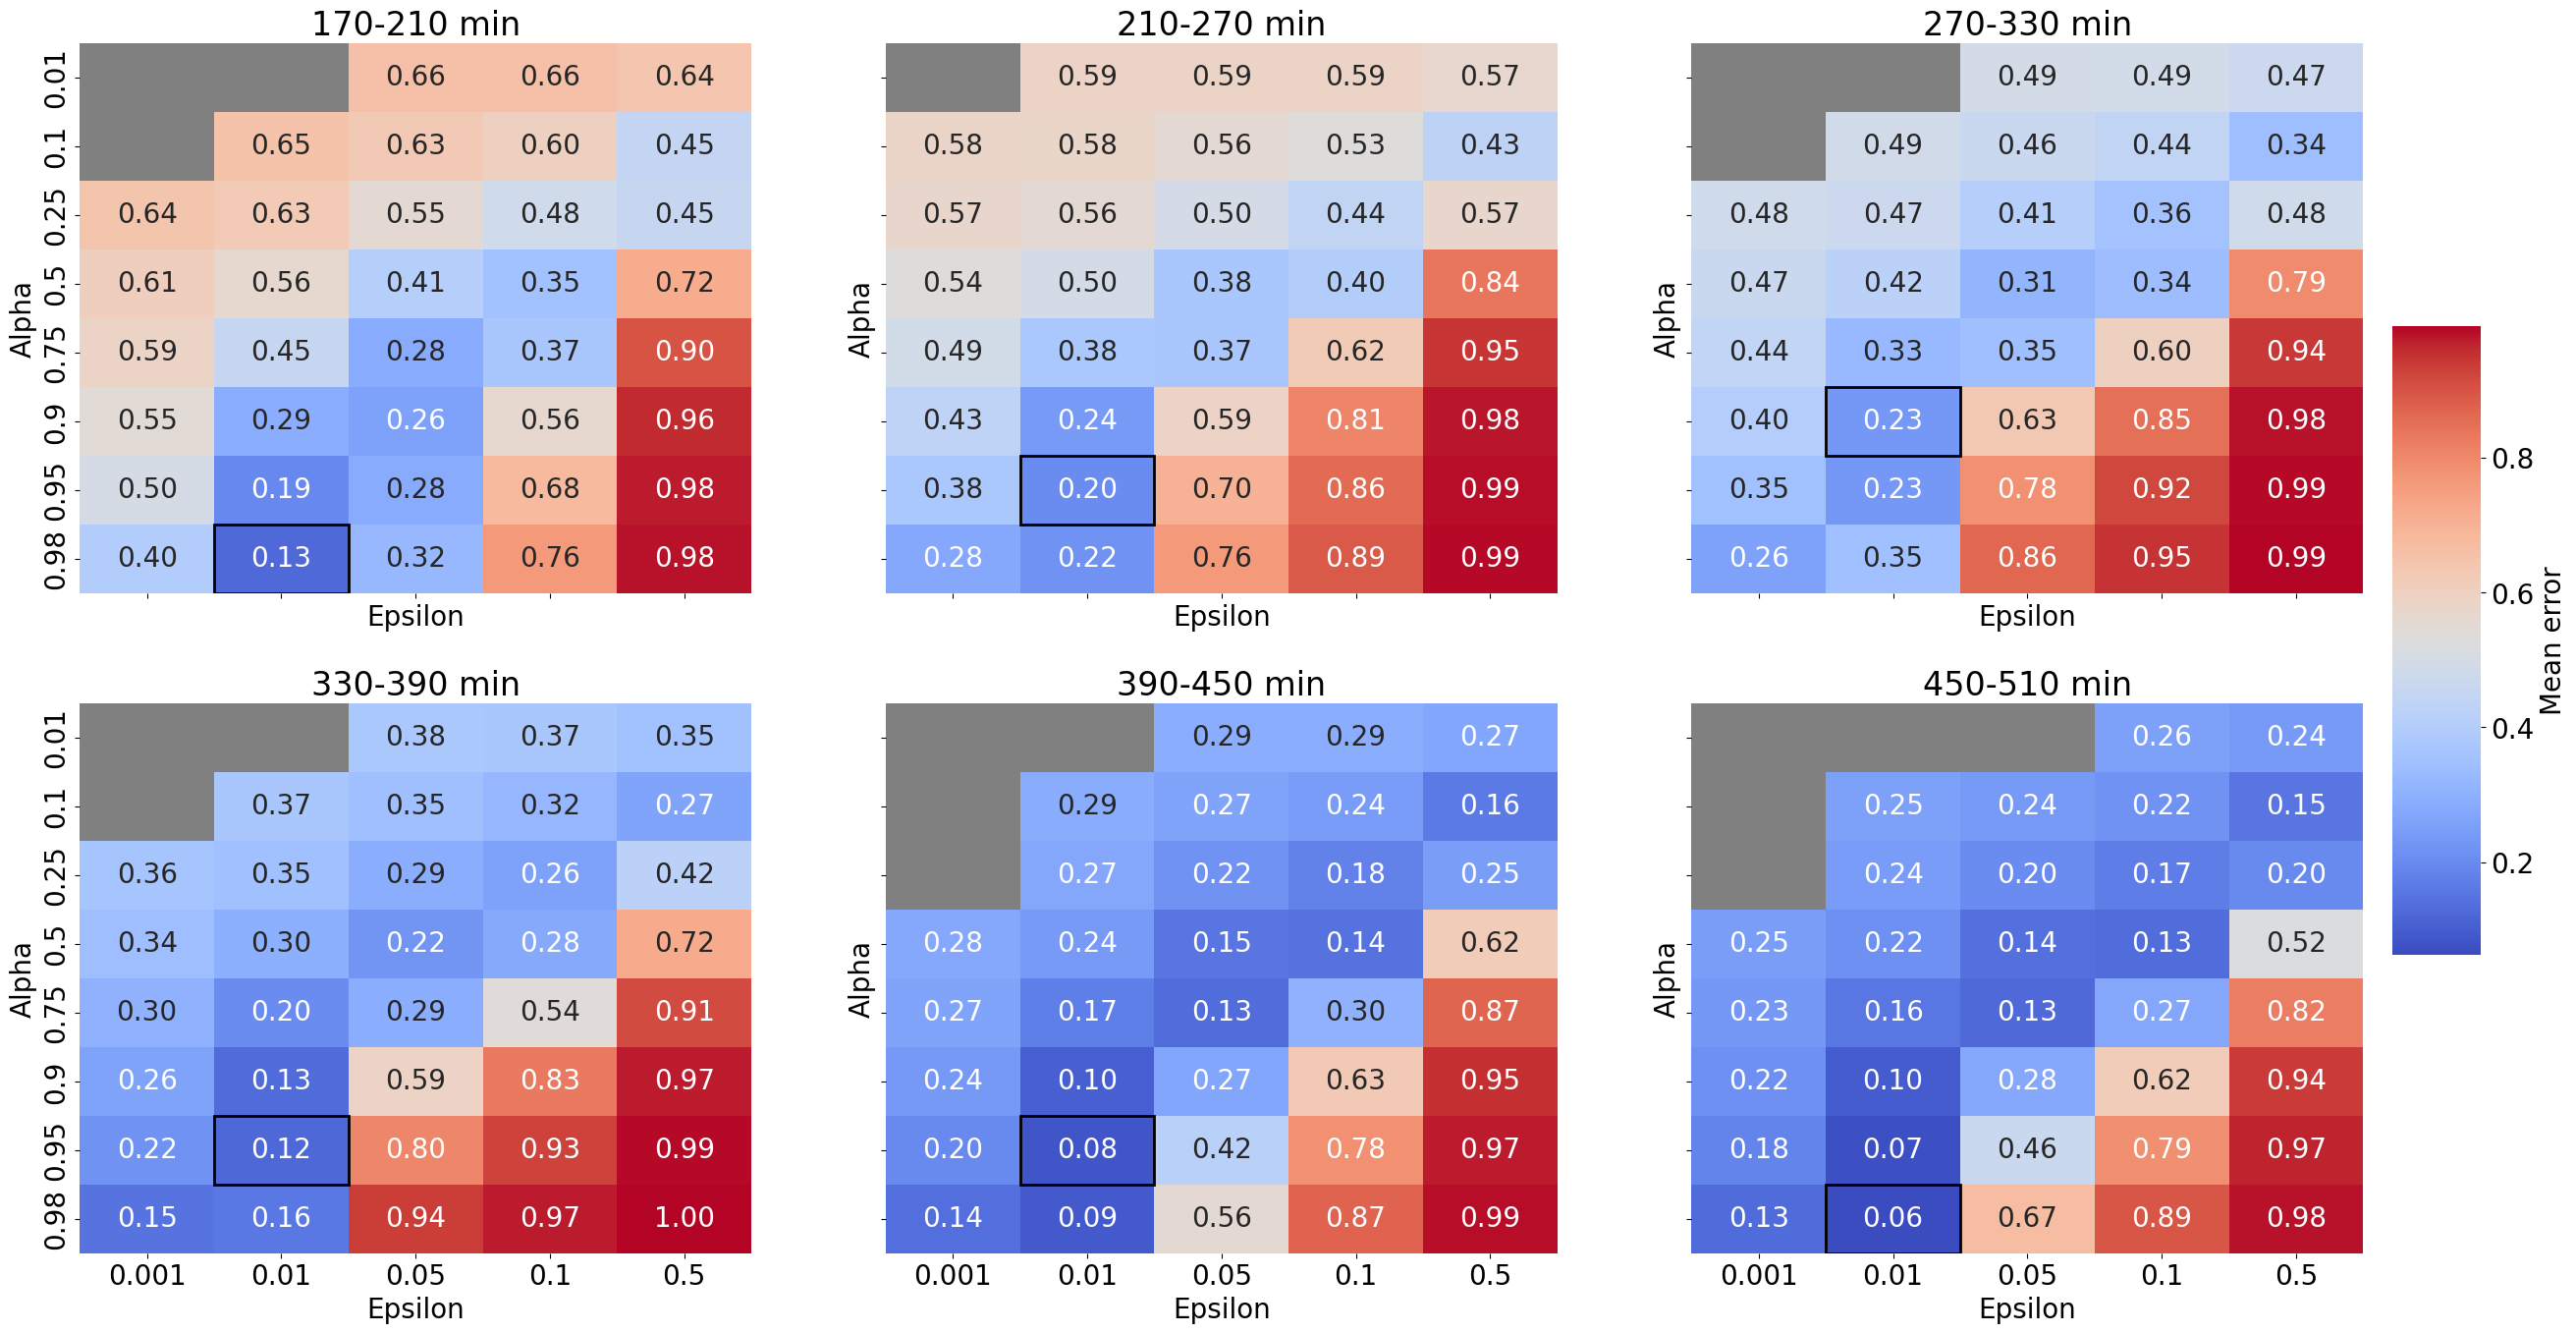

In [9]:
lineage_info = "precise"

with plt.rc_context(rc={"font.size": 20}):
    mu.pl.gridsearch_heatmap(
        runs_df, converged=True, lineage_info=lineage_info, save=FIG_DIR / f"gridsearch_heatmap_{lineage_info}.pdf"
    )

Lineage info: abpxp
Not saving the figure, as `moslin_utils.settings.save_figures` is set to `False`.


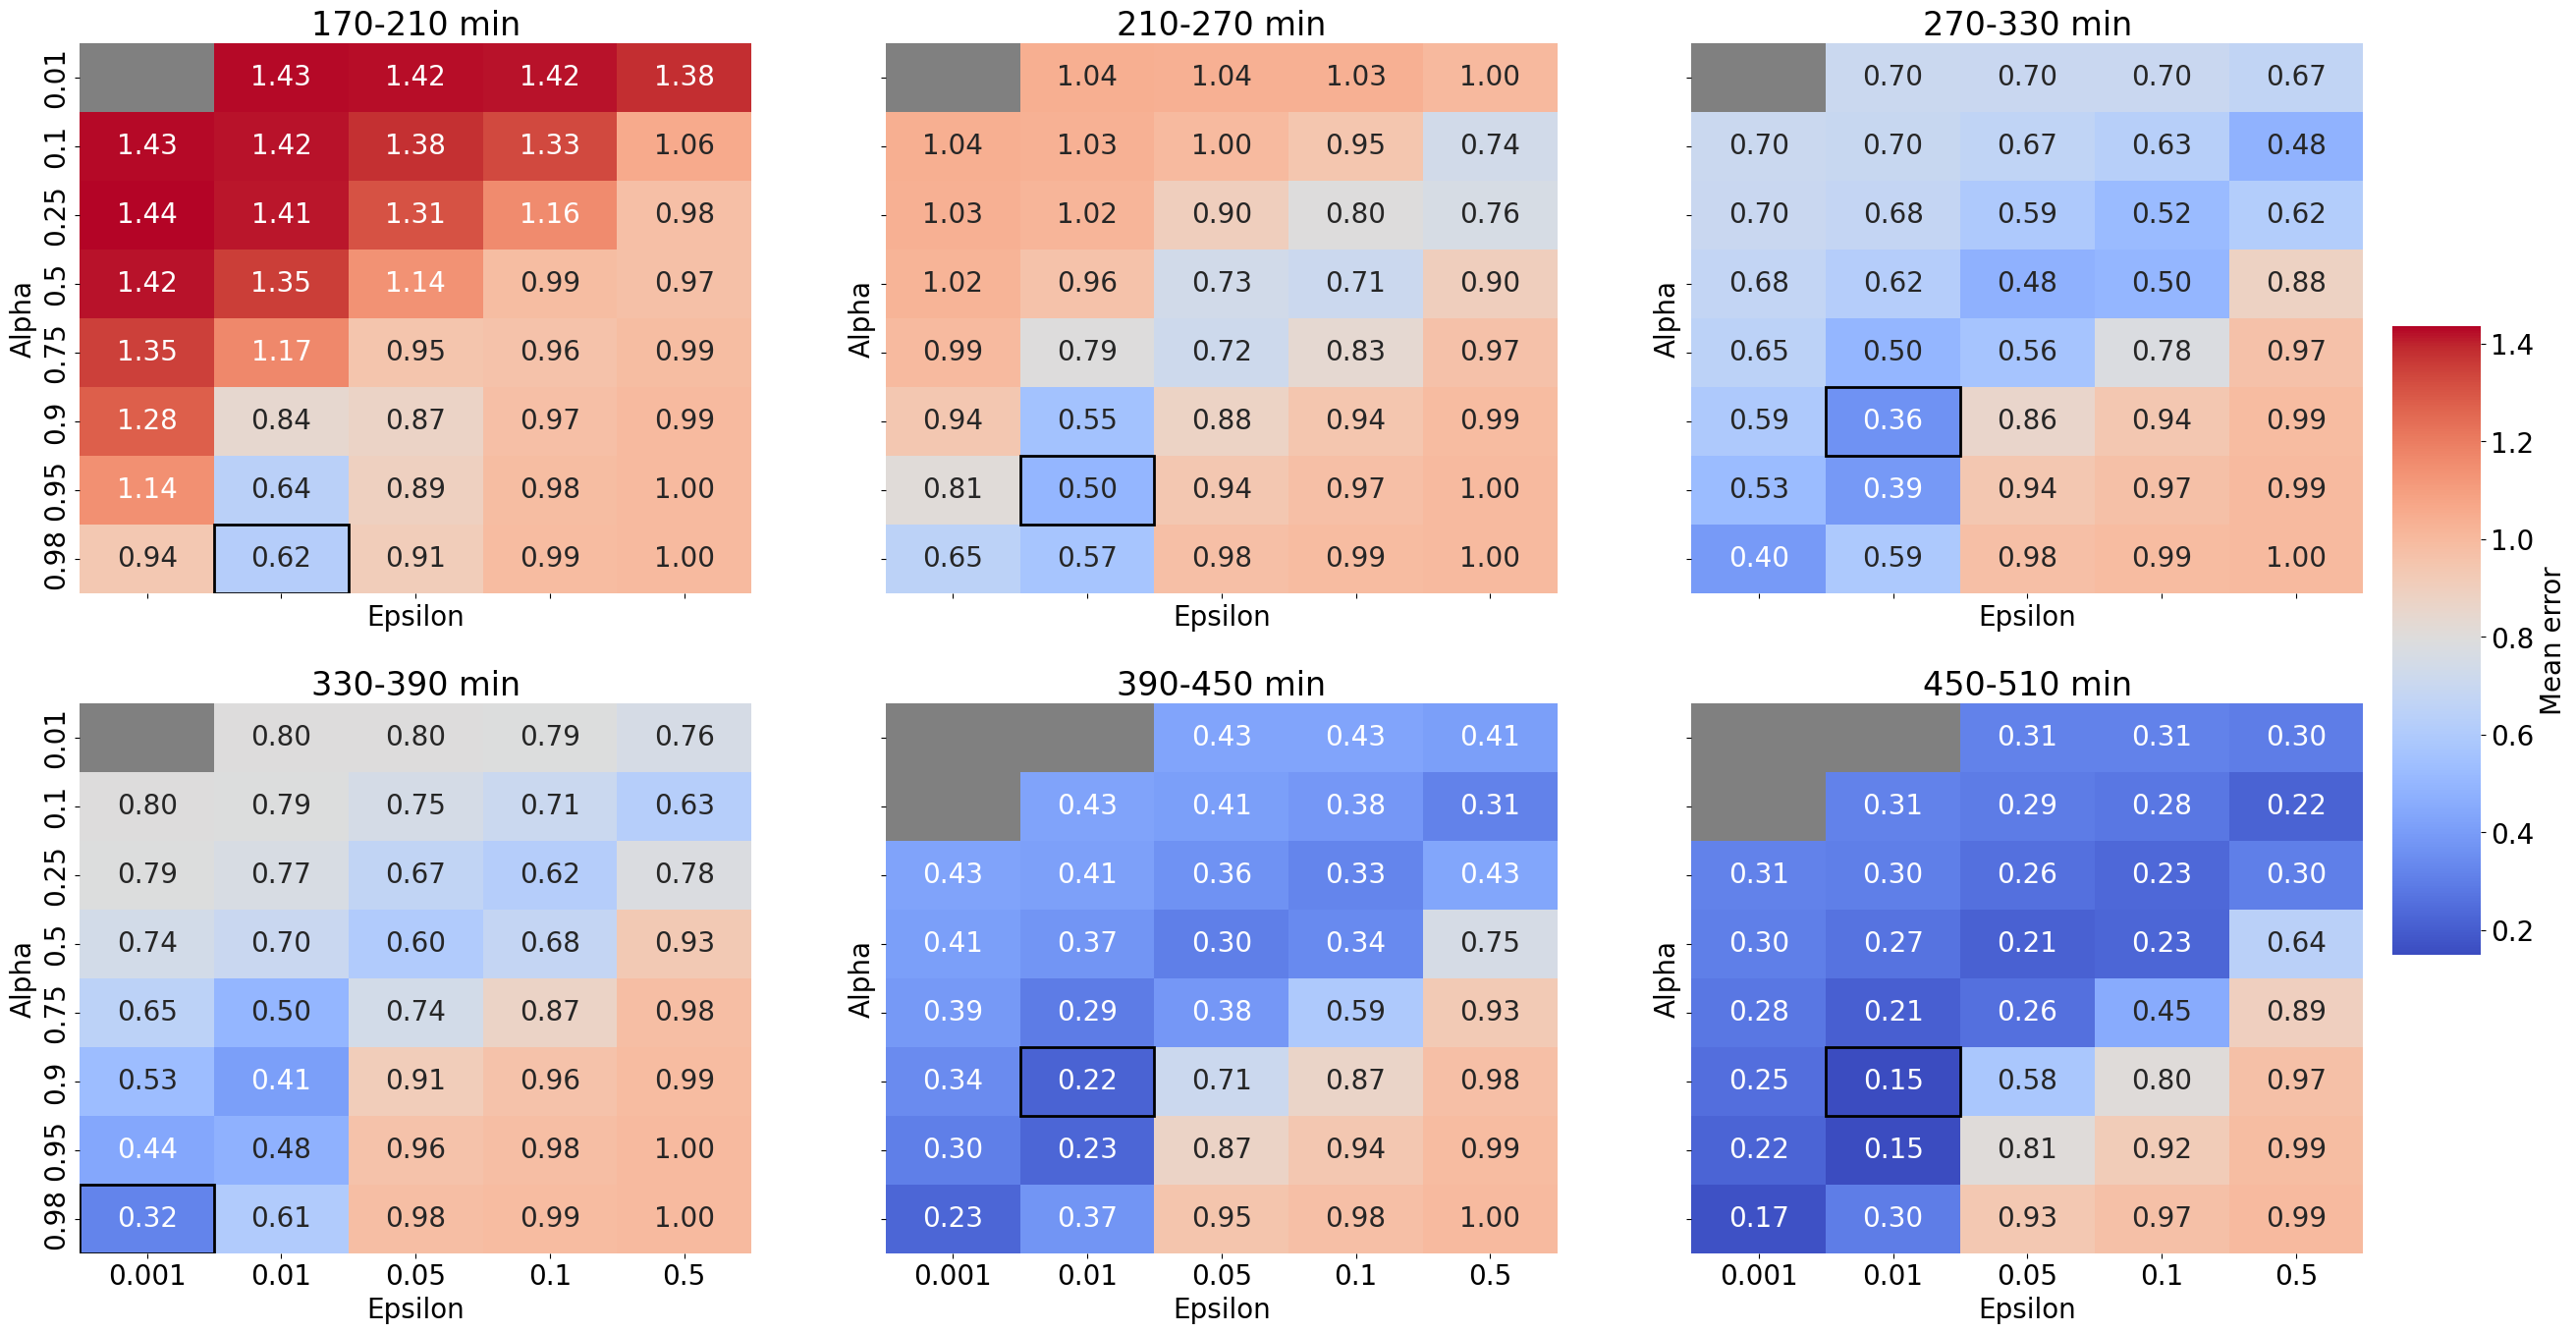

In [10]:
lineage_info = "abpxp"

with plt.rc_context(rc={"font.size": 20}):
    mu.pl.gridsearch_heatmap(
        runs_df, converged=True, lineage_info=lineage_info, save=FIG_DIR / f"gridsearch_heatmap_{lineage_info}.pdf"
    )